# HW1: Datatypes and Wrangling

Hector Corrada Bravo

Feb 2, 2020

## Data Types

_1) Provide a URL to the dataset._


I downloaded my dataset from http://www.hcbravo.org/IntroDataSci/misc/BPD_Arrests.csv

_2) Explain why you chose this dataset._ 

I am interested in studying how rates of arrests in different parts of Baltimore are related to demographic statistics.

_3) What are the entities in this dataset? How many are there?_

Entities are specific arrests. There are 104528.

_4) How many attributes are there in this dataset?_

There are 15 attributes.

_5) What is the datatype of each attribute (categorical -ordered or unordered-, numeric -discrete or continuous-, datetime, geolocation, other)? Write a short sentence stating how you determined the type of each attribute. Do this for at least 5 attributes, if your dataset contains more than 10 attributes, choose 10 of them to describe._

| Num | Name | Type | Description |
|-----|------|------|-------------|
| 1 | `arrest` | categorical | Identifier of each arrest, takes values from finite set |
| 2 | `age` | numeric continuous | Ages are numeric values measured in time units |
| 3 | `race` | categorical unordered | Can take value from finite set of possible races |
| 4 | `sex` | categorical unordered | Can take value from finite set of possible sexes |
| 5 | `arrestDate` | datetime | Specifies date of arrest |
| 6 | `arrestTime` | datetime | Specifies time of arrest |
| 7 | `arrestLocation` | other - address | Street address of arrest |
| 8 | `incidentOffense` | categorical unordered | Can take value from finite set of possible offenses |
| 9 | `incidentLocation` | other - address | Stree address if incident |
| 10 | `charge` | categorical unordered | Can take value from finite set of possible charges |


_6) Write python code that loads the dataset using function `pd.read_csv`. Were you able to load the data successfully? If no, why not?_

In [6]:
import pandas as pd

url = "http://www.hcbravo.org/IntroDataSci/misc/BPD_Arrests.csv"
arrest_tab = pd.read_csv(url)
arrest_tab.head(10)

,arrest,age,race,sex,arrestDate,arrestTime,arrestLocation,incidentOffense,incidentLocation,charge,chargeDescription,district,post,neighborhood,Location 1
0,11126858.0,23,B,M,01/01/2011,00:00:00,NaN,Unknown Offense,NaN,3 0233,Cds:P W/I Dist:Narc || Cds:Poss W/Intent Dist:...,NaN,NaN,NaN,NaN
1,11127013.0,37,B,M,01/01/2011,00:01:00,2000 Wilkens Ave,79-Other,Wilkens Av & S Payson St,1 1425,Reckless Endangerment || Hand Gun Violation,SOUTHERN,934.0,Carrollton Ridge,"(39.2814026274, -76.6483635135)"
2,11126887.0,46,B,M,01/01/2011,00:01:00,2800 Mayfield Ave,Unknown Offense,NaN,NaN,Unknown Charge,NORTHEASTERN,415.0,Belair-Edison,"(39.3227699160, -76.5735750473)"
3,11126873.0,50,B,M,01/01/2011,00:04:00,2100 Ashburton St,79-Other,2100 Ashburton St,1 1106,Reg Firearm:Illegal Possession || Hgv,WESTERN,735.0,Panway/Braddish Avenue,"(39.3117196723, -76.6623546313)"
4,11126968.0,33,B,M,01/01/2011,00:05:00,4000 Wilsby Ave,Unknown Offense,1700 Aliceanna St,NaN,Unknown Charge,NORTHERN,525.0,Pen Lucy,"(39.3382885254, -76.6045667070)"
5,11127041.0,41,B,M,01/01/2011,00:05:00,2900 Spellman Rd,81-Recovered Property,2900 Spelman Rd,1 1425,Reckless Endangerment || Handgun Violation,SOUTHERN,924.0,Cherry Hill,"(39.2449886230, -76.6273582432)"
6,11126932.0,29,B,M,01/01/2011,00:05:00,800 N Monroe St,79-Other,800 N Monroe St,1 5212,Handgun On Person || Handgun Violation,WESTERN,724.0,Midtown-Edmondson,"(39.2979815407, -76.6475113571)"
7,11126940.0,20,W,M,01/01/2011,00:05:00,5200 Moravia Rd,Unknown Offense,NaN,1 5200,Deadly Weapon-Int/Injure || Aggravated Assault,NORTHEASTERN,436.0,Frankford,"(39.3235271620, -76.5496555072)"
8,11127051.0,24,B,M,01/01/2011,00:07:00,2400 Gainsdbourgh Ct,54-Armed Person,2400 Gainsborough Ct,1 1106,Reg Firearm:Illegal Possession || Firearms Vio...,NaN,NaN,NaN,NaN
9,11127018.0,53,B,M,01/01/2011,00:15:00,3300 Woodland Ave,54-Armed Person,3300 Woodland Av,1 1425,Reckless Endangerment || Hgv,NORTHWESTERN,614.0,Central Park Heights,"(39.3436773374, -76.6727297618)"


## Wrangling

1) My pipeline computes average arrest age (ignoring ages <= 0), for each district and writes them in increasing order. It would be useful to see which districts tend to arrest younger individuals.

In [16]:
mean_ages = (arrest_tab[['district','age']]
    .query('age > 0')
    .groupby(['district'])
    .agg({'age': 'mean'})
    .reset_index()
    .sort_values(['age'])
)
mean_ages

,district,age
2,NORTHEASTERN,30.431111
6,SOUTHERN,32.346947
7,SOUTHWESTERN,32.454487
5,SOUTHEASTERN,32.515476
0,CENTRAL,33.056902
3,NORTHERN,33.128878
1,EASTERN,34.140232
8,WESTERN,34.364334
4,NORTHWESTERN,34.627681


## Plotting

1) This barplot shows the average arrest age per district (ignoring ages <= 0)

/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/plotnine/utils.py:284: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/pandas/core/generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/pandas/core/generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/plotnine/positions/position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


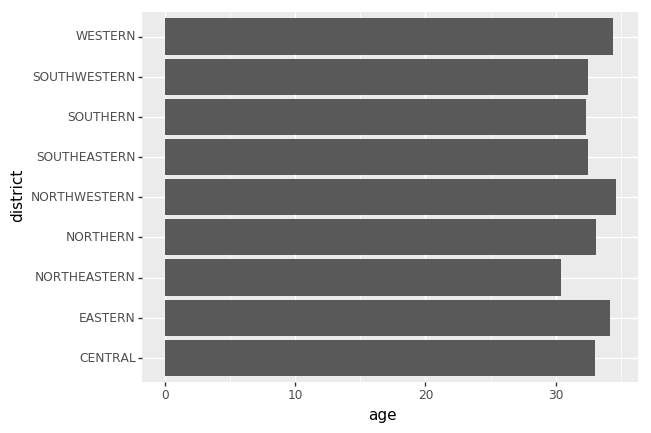

<ggplot: (291179833)>

In [17]:
from plotnine import *

(ggplot(mean_ages, aes(x='district', y='age')) +
    geom_bar(stat='identity') +
    coord_flip())